In [110]:
import gensim
import pandas as pd
import re
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.manifold import TSNE

In [20]:
#Import Dataset And Choose The Comment Body
data = pd.read_csv("2014.csv",nrows = 10000)
data=pd.DataFrame(data,columns=['body'])
data

,body
0,One of us\n\nOne of us\n\nOne of us
1,I wasn't thinking straight. I was blacked out ...
2,Yeah I tend to over do xanax and adderal at ti...
3,I don't think the whole 'addictive personality...
4,Yep pretty much. Up to long on Adderal turned ...
...,...
9995,"“Sometimes, I think I should just run away. Bu..."
9996,I basically put those in that cup after i used...
9997,Behold!\n\nhttps://www.butrans.com/\n\nIt come...
9998,Like I said with someone else... When you're d...


In [21]:
#Drop Null Value
data.dropna()

,body
0,One of us\n\nOne of us\n\nOne of us
1,I wasn't thinking straight. I was blacked out ...
2,Yeah I tend to over do xanax and adderal at ti...
3,I don't think the whole 'addictive personality...
4,Yep pretty much. Up to long on Adderal turned ...
...,...
9995,"“Sometimes, I think I should just run away. Bu..."
9996,I basically put those in that cup after i used...
9997,Behold!\n\nhttps://www.butrans.com/\n\nIt come...
9998,Like I said with someone else... When you're d...


In [53]:
#Elimate ppercase letter, punctuation,emoji and extra spaces.
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]','', text)  # Remove punctuation and emoji
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

data=pd.DataFrame(data['body'].map(preprocess_text))
#Drop the deleted value
data=data[ data['body'].str.contains( 'deleted' )==False ]
data.reset_index(drop=True, inplace= True)

In [114]:
#Create  CORPUS
wordlist = data['body']
newlist=[]
for w in range(0,len(wordlist)-1):
    newlist.append(wordlist[w].split())

In [56]:
#Create Word2Vec Model
model = Word2Vec(sentences=newlist, window=4, min_count=1, workers=4)

In [57]:
print(model)
model.save('model.bin')

Word2Vec(vocab=17446, vector_size=100, alpha=0.025)


In [115]:
#General View Of The Model
model.wv.index_to_key

['i',
 'the',
 'to',
 'a',
 'and',
 'you',
 'it',
 'of',
 'that',
 'in',
 'is',
 'for',
 'my',
 'but',
 'on',
 'was',
 'just',
 'have',
 'with',
 'if',
 'me',
 'be',
 'like',
 'so',
 'this',
 'im',
 'not',
 'your',
 'its',
 'get',
 'or',
 'are',
 'up',
 'as',
 'they',
 'dont',
 'all',
 'out',
 'do',
 'at',
 'about',
 'what',
 'can',
 'when',
 'would',
 'he',
 'from',
 'some',
 'know',
 'them',
 'had',
 'no',
 'one',
 'really',
 'ive',
 'time',
 'good',
 'there',
 'an',
 'shit',
 'people',
 'think',
 'more',
 'then',
 'how',
 'will',
 'got',
 'much',
 'even',
 'thats',
 'only',
 'because',
 'never',
 'youre',
 'been',
 'take',
 'now',
 'day',
 'than',
 'way',
 'too',
 'go',
 'dope',
 'feel',
 'well',
 'high',
 'going',
 'make',
 'off',
 'back',
 'use',
 'could',
 'were',
 'we',
 'lol',
 'any',
 'here',
 'also',
 'right',
 'did',
 'still',
 'want',
 'being',
 'man',
 'him',
 'though',
 'by',
 'didnt',
 'sure',
 'after',
 'her',
 'has',
 'she',
 'into',
 'yeah',
 'his',
 'cant',
 'who',
 

In [87]:
model.wv.get_normed_vectors()

array([[-0.07073259,  0.08119845,  0.10199382, ..., -0.10581277,
        -0.07563087,  0.08153685],
       [-0.13411732,  0.08646014,  0.03955672, ..., -0.08422359,
        -0.03625399,  0.0495505 ],
       [-0.00794157,  0.07440466, -0.09784133, ...,  0.02165826,
        -0.01577241, -0.107632  ],
       ...,
       [-0.04181929,  0.10439989,  0.03595186, ..., -0.07990136,
        -0.02769101, -0.02232146],
       [-0.0420827 ,  0.18734786, -0.03626641, ...,  0.04555752,
         0.14941044,  0.1728521 ],
       [ 0.05942006,  0.17836054, -0.09453187, ...,  0.00358337,
         0.03910017,  0.00613265]], dtype=float32)

In [68]:
#100 Closest Word to 'herion'
model.wv.most_similar(positive='herion',topn=100)

[('case', 0.9579232931137085),
 ('common', 0.957632303237915),
 ('stupid', 0.9573732018470764),
 ('dead', 0.9573421478271484),
 ('omg', 0.9570592045783997),
 ('basically', 0.9569814801216125),
 ('jesus', 0.9566181302070618),
 ('doing', 0.9564690589904785),
 ('making', 0.9563835859298706),
 ('feeling', 0.9563689231872559),
 ('constantly', 0.9562485814094543),
 ('fact', 0.9556764364242554),
 ('information', 0.9549821615219116),
 ('worth', 0.9548245072364807),
 ('method', 0.9547450542449951),
 ('strange', 0.954721212387085),
 ('mainly', 0.9541695713996887),
 ('thin', 0.9540984630584717),
 ('technically', 0.9539980292320251),
 ('important', 0.953984260559082),
 ('fucking', 0.9538685083389282),
 ('amazing', 0.9537516236305237),
 ('goddamn', 0.9537425637245178),
 ('issue', 0.9536083936691284),
 ('ps', 0.9535552859306335),
 ('wherever', 0.9535478353500366),
 ('learning', 0.9533801674842834),
 ('hearing', 0.9533053636550903),
 ('confused', 0.9532603025436401),
 ('magical', 0.9530605673789978),

In [104]:
#ViVisualization
RelativeWords = ['heroin','diamorphine','methamphetamine','dopes','fentanyl','antagonists','suboxone',"codeine"]
X=[]
for x in nearWords:
    X.append(model.wv.get_vector("x", norm=True))


In [112]:
tsne = TSNE(n_components=2, random_state=0)
result = tsne.fit_transform(X)

G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


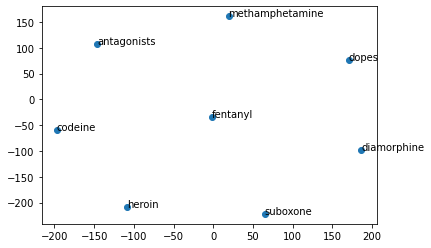

In [113]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(nearWords):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()